
=== Condition: Block ===
                            OLS Regression Results                            
Dep. Variable:            Performance   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     1.245
Date:                Tue, 15 Jul 2025   Prob (F-statistic):              0.320
Time:                        04:35:33   Log-Likelihood:                -69.204
No. Observations:                  24   AIC:                             146.4
Df Residuals:                      20   BIC:                             151.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const 

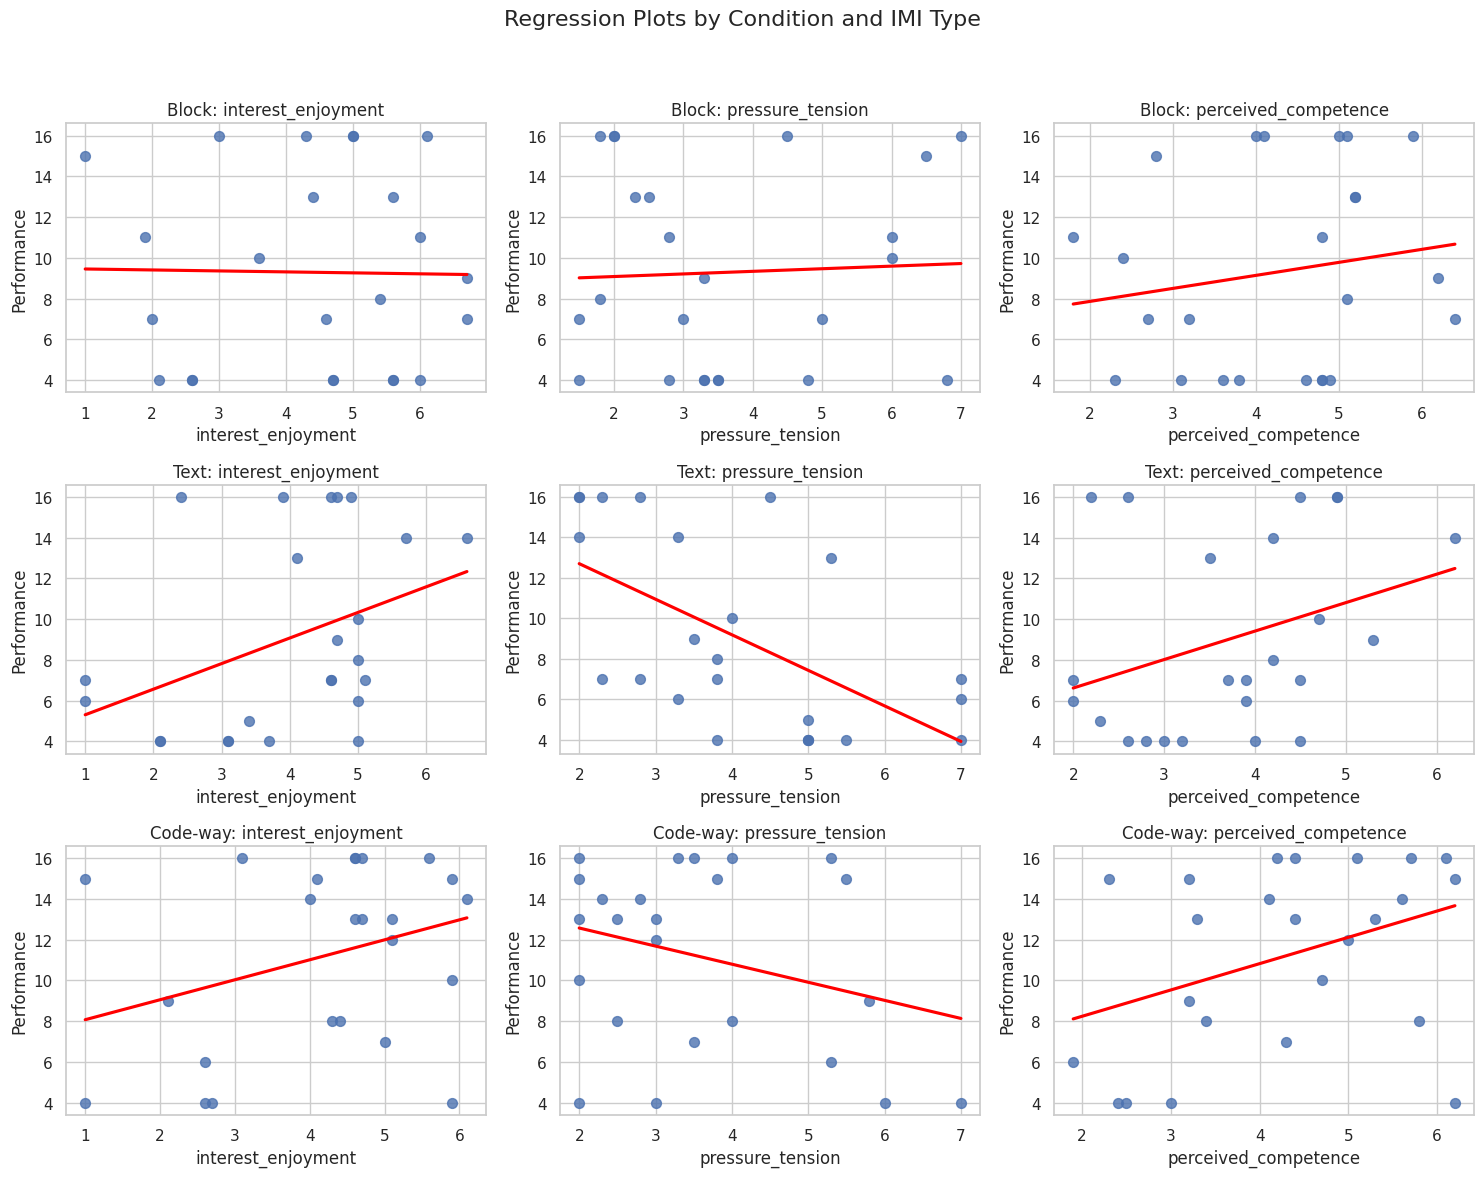

In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# 讀取資料
load_df = pd.read_csv('newimi.csv')
performance_df = pd.read_csv('學習成效 - 分環境.csv')

# 整理學習成效資料（寬轉長）
long_perf = pd.melt(performance_df,
                    id_vars=['ID'],
                    var_name='Condition',
                    value_name='Performance')

# Condition 順序對應
condition_order = ['Block', 'Text', 'Code-way']

# 對 load_df 加上 ID 與 Condition（每人3筆資料）
repeated_ids = performance_df['ID'].repeat(3).reset_index(drop=True)
load_df['ID'] = repeated_ids
load_df['Condition'] = condition_order * len(performance_df)

# 合併資料
merged_df = pd.merge(long_perf,
                     load_df[['ID', 'Condition', 'interest_enjoyment', 'pressure_tension', 'perceived_competence']],
                     on=['ID', 'Condition'])

# 設定 Seaborn 美化風格
sns.set(style="whitegrid")

# 建立繪圖區域
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Regression Plots by Condition and IMI Type', fontsize=16)

# 執行每個 condition 的回歸分析與視覺化
for i, cond in enumerate(merged_df['Condition'].unique()):
    print(f"\n=== Condition: {cond} ===")
    subset = merged_df[merged_df['Condition'] == cond]

    X = subset[['interest_enjoyment', 'pressure_tension', 'perceived_competence']]
    X = sm.add_constant(X)
    y = subset['Performance']

    model = sm.OLS(y, X).fit()
    print(model.summary())  # 印出模型摘要

    # 視覺化每種負荷與學習成效的關係
    for j, var in enumerate(['interest_enjoyment', 'pressure_tension', 'perceived_competence']):
        ax = axes[i, j]
        sns.regplot(x=subset[var], y=subset['Performance'], ax=ax,
                    ci=None, scatter_kws={"s": 50}, line_kws={"color": "red"})
        ax.set_title(f"{cond}: {var}")
        ax.set_xlabel(var)
        ax.set_ylabel('Performance')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [3]:
import statsmodels.formula.api as smf

# 確保 Condition 是類別型變項
merged_df['Condition'] = merged_df['Condition'].astype('category')

# 建立模型並輸出重點資訊
for load in ['interest_enjoyment', 'pressure_tension', 'perceived_competence']:
    print(f"\n=== Model: {load} × Condition predicting Performance ===")

    # 建立模型
    formula = f"Performance ~ {load} * Condition"
    model = smf.ols(formula, data=merged_df).fit()

    # 印出回歸結果摘要
    print(model.summary())



=== Model: interest_enjoyment × Condition predicting Performance ===
                            OLS Regression Results                            
Dep. Variable:            Performance   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1.800
Date:                Tue, 15 Jul 2025   Prob (F-statistic):              0.125
Time:                        04:35:39   Log-Likelihood:                -208.61
No. Observations:                  72   AIC:                             429.2
Df Residuals:                      66   BIC:                             442.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------